In [1]:
import os
import torch
import torchvision.transforms as transforms
import cv2

from utils import plt_imshow

from network.Transformer import Transformer

In [2]:
def make_cartoon(img, size=450, style="Hayao"):
    model = Transformer()
    model.load_state_dict(torch.load(os.path.join('pretrained_model', style + '_net_G_float.pth')))
    model.eval()
    print('{} Model loaded!'.format(style))
    
    T = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(img_size, 2),
    transforms.ToTensor()])

    img_input = T(img).unsqueeze(0)
    img_input = -1 + 2 * img_input
    
    img_output = model(img_input)

    img_output = (img_output.squeeze().detach().numpy() + 1.) / 2.
    img_output = img_output.transpose([1, 2, 0])
    
    plt_imshow([style], [img_output], figsize=(16, 10))

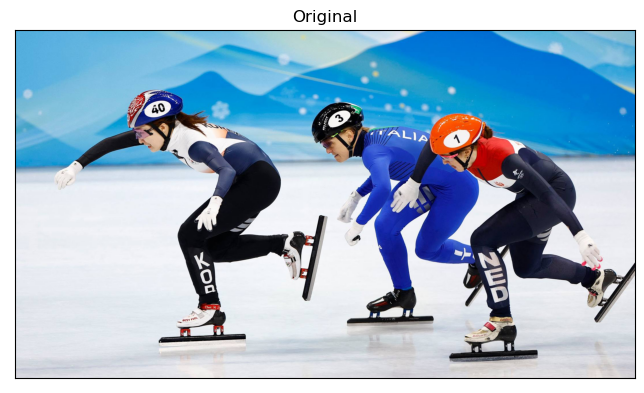

In [4]:
img_size = 450
img_path = 'C:/Users/do150/Desktop/test_image.jpg'
img = cv2.imread(img_path)

plt_imshow(["Original"], [img])

Hayao Model loaded!


C:\Users\do150\anaconda3\envs\scan\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


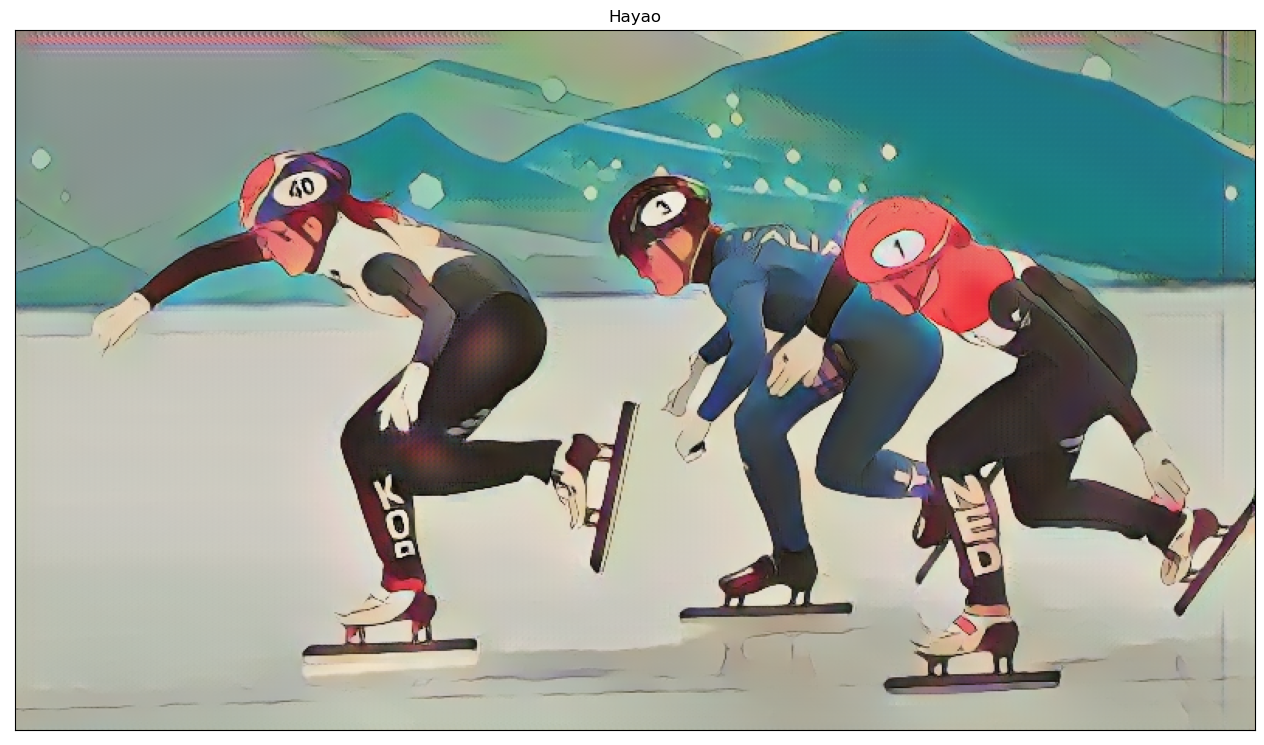

In [6]:
make_cartoon(img, size=450, style="Hayao")

Hosoda Model loaded!


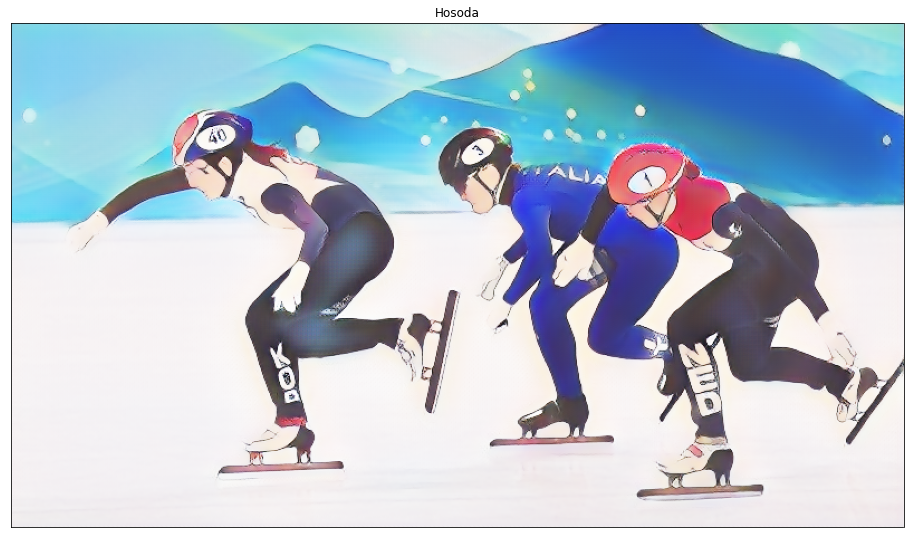

In [72]:
make_cartoon(img, size=450, style="Hosoda")

Paprika Model loaded!


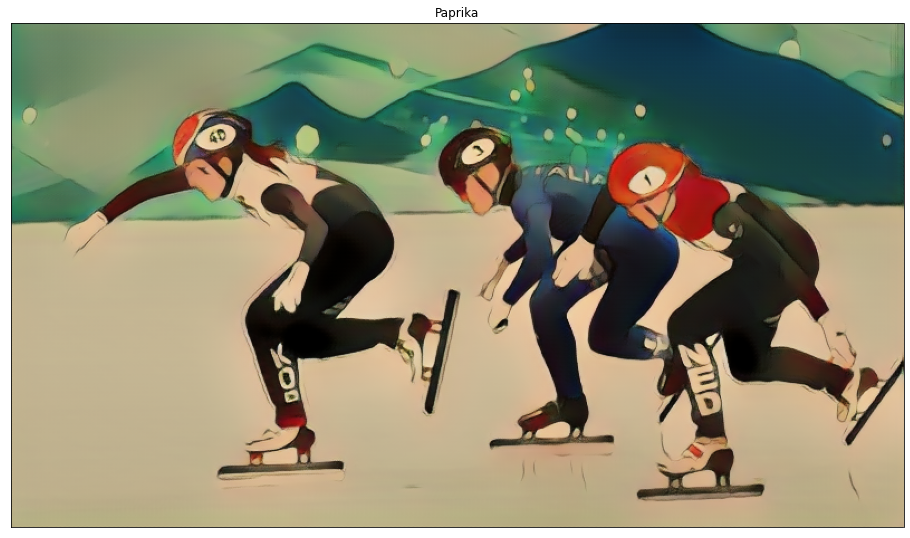

In [73]:
make_cartoon(img, size=450, style="Paprika")

Shinkai Model loaded!


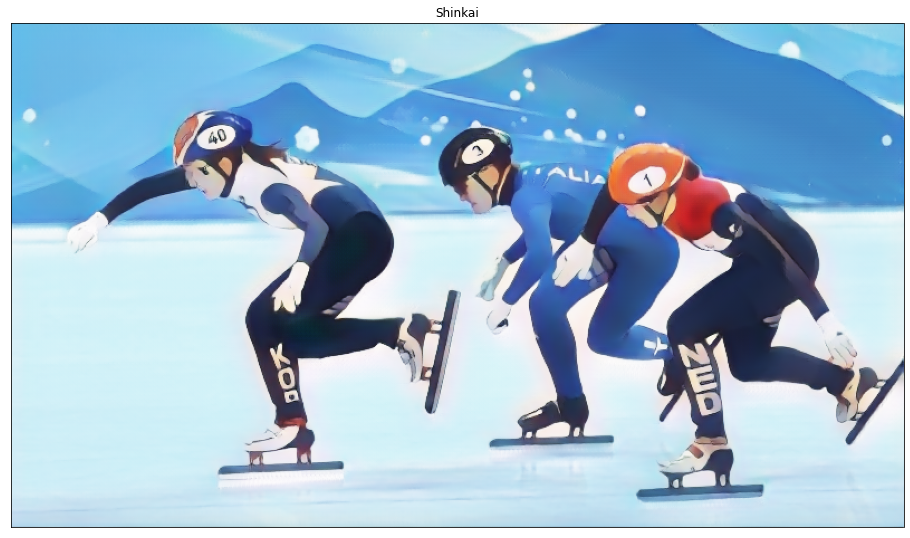

In [74]:
make_cartoon(img, size=450, style="Shinkai")